In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

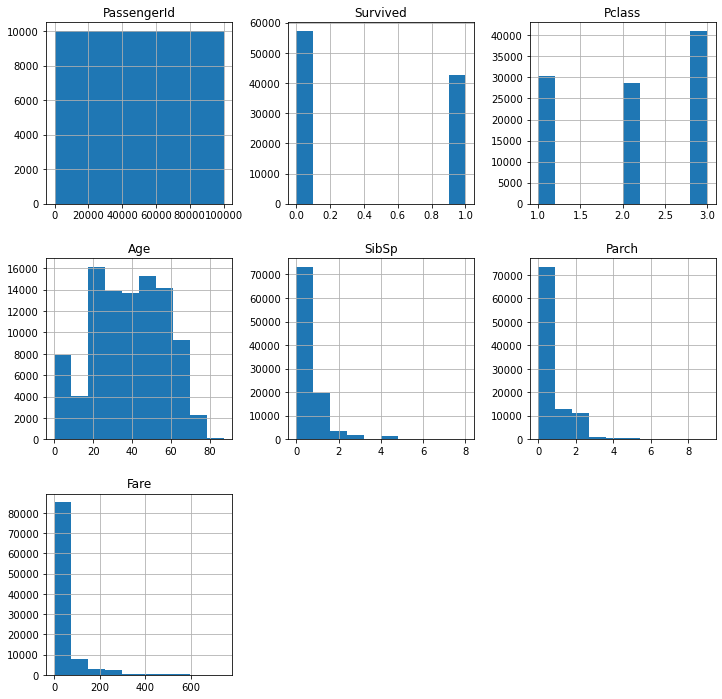

In [13]:
data.hist(figsize=(12,12))

In [14]:
data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [15]:
test.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age             3487
SibSp              0
Parch              0
Ticket          5181
Fare             133
Cabin          70831
Embarked         277
dtype: int64

In [16]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

data['Fare'].fillna(data['Fare'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [19]:
data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket          4623
Fare               0
Cabin          67866
Embarked         250
dtype: int64

In [20]:
data.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
test.replace({'Sex':{'male':0, 'female':1}}, inplace=True)

In [26]:
data['Embarked'].value_counts()
test['Embarked'].value_counts()

S    68842
C    22308
Q     8573
Name: Embarked, dtype: int64

In [27]:
data['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [28]:
data.replace({'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
test.replace({'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",0,38.355472,2,0,209245,27.14,C12239,0
1,1,0,3,"Bryan, Drew",0,38.355472,0,0,27323,13.35,NaN,0
2,2,0,3,"Owens, Kenneth",0,0.330000,1,2,CA 457703,71.29,NaN,0
3,3,0,3,"Kramer, James",0,19.000000,0,0,A. 10866,13.04,NaN,0
4,4,1,3,"Bond, Michael",0,25.000000,0,0,427635,7.76,NaN,0


In [32]:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1).copy()
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1).copy()

In [33]:
X_train = data.drop('Survived', axis=1).copy()
y_train = data['Survived']

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
tree.score(X_train,y_train)

0.76372

In [41]:
X_train = X_train.drop('PassengerId', axis=1).copy()

In [42]:
tree.fit(X_train,y_train)
tree.score(X_train,y_train)

0.76372